# Analysis on Job Listings for Data Scientist, Data Engineer, Data Analyst, and Business Analyst

Questions
* Job Category
    - Salary level per job category
    - Degree requirement per job category
* Job Opportunities
    - Demand & salary per sector
    - Demand & salary per State
* Most desired tech skills
    - Programming languages that are mentioned the most

### 1. Read Data

In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [689]:
df_ds = pd.read_csv('DataScientist.csv',na_values = [-1,'Unknown','Unknown / Non-Applicable'])
df_da = pd.read_csv('DataAnalyst.csv',na_values = [-1,'Unknown','Unknown / Non-Applicable'])
df_de = pd.read_csv('DataEngineer.csv',na_values = [-1,'Unknown','Unknown / Non-Applicable'])
df_ba = pd.read_csv('BusinessAnalyst.csv',na_values = [-1,'Unknown','Unknown / Non-Applicable'])


df_ba.drop(['Unnamed: 0','index'],axis=1, inplace=True)
df_ds.drop(['Unnamed: 0','index'],axis=1, inplace=True)
df_da.drop(['Unnamed: 0'],axis=1, inplace=True)

df_ba = df_ba.head(3692)

df_ds['Job Category'] = 'Data Scientist'
df_da['Job Category'] = 'Data Analyst'
df_de['Job Category'] = 'Data Engineer'
df_ba['Job Category'] = 'Business Analyst'

df = pd.concat([df_ds, df_da, df_de, df_ba])
df.reset_index(drop=True, inplace=True)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,Job Category
0,Senior Data Scientist,$111K-$181K (Glassdoor est.),"ABOUT HOPPER\n\nAt Hopper, we’re on a mission ...",3.5,Hopper\n3.5,"New York, NY","Montreal, Canada",501 to 1000 employees,2007.0,Company - Private,Travel Agencies,Travel & Tourism,NaN,NaN,NaN,Data Scientist
1,"Data Scientist, Product Analytics",$111K-$181K (Glassdoor est.),"At Noom, we use scientifically proven methods ...",4.5,Noom US\n4.5,"New York, NY","New York, NY",1001 to 5000 employees,2008.0,Company - Private,"Health, Beauty, & Fitness",Consumer Services,NaN,NaN,NaN,Data Scientist
2,Data Science Manager,$111K-$181K (Glassdoor est.),Decode_M\n\nhttps://www.decode-m.com/\n\nData ...,NaN,Decode_M,"New York, NY","New York, NY",1 to 50 employees,NaN,NaN,NaN,NaN,NaN,NaN,True,Data Scientist
3,Data Analyst,$111K-$181K (Glassdoor est.),Sapphire Digital seeks a dynamic and driven mi...,3.4,Sapphire Digital\n3.4,"Lyndhurst, NJ","Lyndhurst, NJ",201 to 500 employees,2019.0,Company - Private,Internet,Information Technology,NaN,"Zocdoc, Healthgrades",NaN,Data Scientist
4,"Director, Data Science",$111K-$181K (Glassdoor est.),"Director, Data Science - (200537)\nDescription...",3.4,United Entertainment Group\n3.4,"New York, NY","New York, NY",51 to 200 employees,2007.0,Company - Private,Advertising & Marketing,Business Services,NaN,"BBDO, Grey Group, Droga5",NaN,Data Scientist


In [467]:
df.shape

(12382, 16)

In [329]:
# Prportion of nulls in each field
df.isnull().mean().sort_values(ascending=False)

Easy Apply           0.957761
Competitors          0.720158
Revenue              0.327411
Founded              0.254805
Industry             0.140688
Sector               0.140446
Rating               0.099580
Size                 0.078016
Type of ownership    0.066629
Headquarters         0.059199
Salary Estimate      0.000081
Company Name         0.000081
Job Title            0.000000
Job Description      0.000000
Location             0.000000
Job Category         0.000000
dtype: float64

### 2. Clean Data
Keep and clean the following fields
* Job Category - Adjust job category per job title
* Salary Estimate - Convert Per Hour salary to Anual Salary; Convert salary range to mean salary
* Company Name - Remove ratings attached to company names
* Location - Break down to State and City; Keep US states only
* Job Description - Extract Degree, Experience, Skillset, Responsibility


In [690]:
df.loc[df['Job Title'].str.lower().str.contains('data scientist'),'Job Category'] = 'Data Scientist'
df.loc[df['Job Title'].str.lower().str.contains('business analyst'),'Job Category'] = 'Business Analyst'
df.loc[df['Job Title'].str.lower().str.contains('data analyst'),'Job Category'] = 'Data Analyst'
df.loc[df['Job Title'].str.lower().str.contains('data engineer'),'Job Category'] = 'Data Engineer'

df['Job Category'].value_counts()

Business Analyst    3436
Data Engineer       3256
Data Analyst        3248
Data Scientist      2442
Name: Job Category, dtype: int64

In [691]:
# Parse salary range to lower bound and upper bound
df_salary = df["Salary Estimate"].str.extract(r'([\d]+)([K$-]*)([\d]+)')

# Calculate mean salary
df['Average Salary'] = (df_salary[0].astype(float) + df_salary[2].astype(float)) / 2

# Convert Per Hour rate to annual salary
is_per_hour = ~df_salary[1].str.contains('K').astype(bool)
df['Average Salary'].loc[is_per_hour] *= 40*52/1000 # 40 hrs per week, 52 weeks a year

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [692]:
df['Average Salary'].value_counts().sort_index(ascending = False)

225.00    29
217.50    14
205.00    30
204.00    30
193.50    29
          ..
37.50     24
37.44      3
36.50     29
36.00     29
33.50     29
Name: Average Salary, Length: 210, dtype: int64

In [693]:
# Clean Company Name
df['Company'] = df['Company Name'].str.replace('\n.*', '')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  


In [700]:
# Location break down to State and City
df['Location'] = df['Location'].str.replace('Greenwood Village, Arapahoe','Arapahoe')
df['Location'] = df['Location'].str.replace('Santa Fe Springs, Los Angeles','Los Angeles')

df_location = df['Location'].str.split(',',expand=True)
df_location.columns = ['City','State']
df_location['State'] = df_location['State'].str.strip()
df = pd.concat([df,df_location],axis=1)

# Keep US states only
states = [ 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
           'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
           'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
           'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
           'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
df = df[df['State'].isin(states)]

In [701]:
df['State'].value_counts()

TX    4001
CA    3310
NY    1100
IL    1055
AZ     931
PA     886
NJ     231
FL     224
OH     212
CO      96
NC      90
DE      74
WA      54
VA      48
UT      33
IN      23
GA       4
SC       3
KS       3
Name: State, dtype: int64

In [840]:
# Extract degrees from job description
bachelor = ['bachelor','bsc','b.eng','b.sc']
master = ['master','msc','m.sc','m.eng','advanced degree']
doctor = ['doctor','phd','doctorate','ph.d']

df['Job Description'] = df['Job Description'].str.replace('\n',' ')
df['Degree']="Unspecified"
for i in df.index:
    if any(word in df['Job Description'][i].lower() for word in bachelor):
        df['Degree'][i] = 'Bachelor'
    elif any(word in df['Job Description'][i].lower() for word in master):
        df['Degree'][i] = 'Master'
    elif any(word in df['Job Description'][i].lower() for word in doctor):
        df['Degree'][i] = 'PhD'

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [841]:
df['Degree'].value_counts()

Bachelor       5542
Unspecified    4972
Master         1293
PhD             571
Name: Degree, dtype: int64

In [755]:
# Extract technical skill set from job description
statistics = ['statistics','statistical']
visualization = ['visualization','visualisation']
python = ['python']
sql = ['sql']


df['Job Description'] = df['Job Description'].str.replace('\n',' ')
df['Degree']="Unspecified"
for i in df.index:
    if any(word in df['Job Description'][i].lower() for word in bachelor):
        df['Degree'][i] = 'Bachelor'
    elif any(word in df['Job Description'][i].lower() for word in master):
        df['Degree'][i] = 'Master'
    elif any(word in df['Job Description'][i].lower() for word in doctor):
        df['Degree'][i] = 'PhD'

In [842]:
df = df[['Job Category','Average Salary','Company','State','City','Size','Sector','Rating','Degree','Job Description']]
df.head()

,Job Category,Average Salary,Company,State,City,Size,Sector,Rating,Degree,Job Description
0,Data Scientist,146.0,Hopper,NY,New York,501 to 1000 employees,Travel & Tourism,3.5,Unspecified,"ABOUT HOPPER At Hopper, we’re on a mission to..."
1,Data Scientist,146.0,Noom US,NY,New York,1001 to 5000 employees,Consumer Services,4.5,Unspecified,"At Noom, we use scientifically proven methods ..."
2,Data Scientist,146.0,Decode_M,NY,New York,1 to 50 employees,NaN,NaN,Master,Decode_M https://www.decode-m.com/ Data Scie...
3,Data Analyst,146.0,Sapphire Digital,NJ,Lyndhurst,201 to 500 employees,Information Technology,3.4,Bachelor,Sapphire Digital seeks a dynamic and driven mi...
4,Data Scientist,146.0,United Entertainment Group,NY,New York,51 to 200 employees,Business Services,3.4,Unspecified,"Director, Data Science - (200537) Description ..."


### 3. Analysis

#### 3.1 Job Category
##### 3.1.1 Salary per job category
Business Analyst and Data Analyst have similar salary with the former slightly lower. Data Engineer has higher salary with median = 96.5K. Data Scientist has the highest salary with median = 111.5K but has less job opennings (n=2442) than the other 3 (n=3200+)

In [703]:
sns.set_palette('Accent')

In [704]:
salary_medians = df.groupby("Job Category")["Average Salary"].median()
salary_order = salary_medians.index

In [705]:
job_counts = df["Job Category"].value_counts()
job_counts = job_counts[salary_order]
job_counts = [str(x) for x in job_counts]
job_counts = ["n=" + i for i in job_counts]
job_counts

['n=3436', 'n=3247', 'n=3256', 'n=2439']

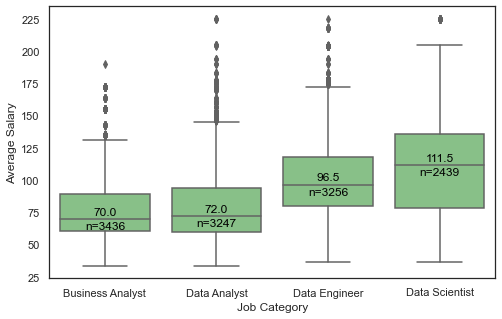

In [706]:
fig, axs = plt.subplots(figsize = [8, 5])
base_color = sns.color_palette("Accent")[0]
box_plot = sns.boxplot(data=df, x='Job Category', y='Average Salary', color=base_color, order = salary_order)

for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick]+3, medians[xtick], 
            horizontalalignment='center',size='medium',color='black')
for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians[xtick]-8, job_counts[xtick], 
            horizontalalignment='center',size='medium',color='black')

##### 3.1.2 Degree requirements per job category

In [843]:
# Data processing
job_degree_counts = df.groupby(['Job Category','Degree']).size().reset_index().rename(columns={0:'Counts'})

job_counts = pd.DataFrame(df['Job Category'].value_counts())
job_counts.columns = ['Total']

job_degree_counts['Total']=None
for i in job_counts.index:
    job_degree_counts.loc[job_degree_counts['Job Category']==i,'Total'] = job_counts['Total'][i]

job_degree_counts['Percentage'] = job_degree_counts['Counts']/job_degree_counts['Total']

<Figure size 864x504 with 0 Axes>

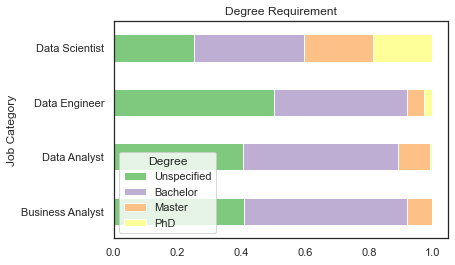

In [863]:
# Visualization
job_degree_pivot = pd.pivot_table(job_degree_counts, values = 'Percentage', index='Job Category', columns = 'Degree')
job_degree_pivot = job_degree_pivot[['Unspecified','Bachelor','Master','PhD']]

plt.figure(figsize = [12, 7])
job_degree_pivot.plot(
    kind = 'barh',
    stacked = True,
    title = 'Degree Requirement',
    mark_right = True);

In [857]:
# Print data
output = job_degree_pivot.to_string(formatters={'Unspecified': '{:,.0%}'.format,
                                                'Bachelor': '{:,.0%}'.format,
                                                'Master': '{:,.0%}'.format,
                                                'PhD': '{:,.0%}'.format})
print(output)

Degree           Unspecified Bachelor Master PhD
Job Category                                    
Business Analyst         41%      51%     8%  0%
Data Analyst             41%      48%    10%  1%
Data Engineer            50%      42%     5%  3%
Data Scientist           25%      35%    21% 19%


#### 3.2 Where are the job opportunities?
##### 3.2.1 Which sector has more data job opportunities/ pays higher

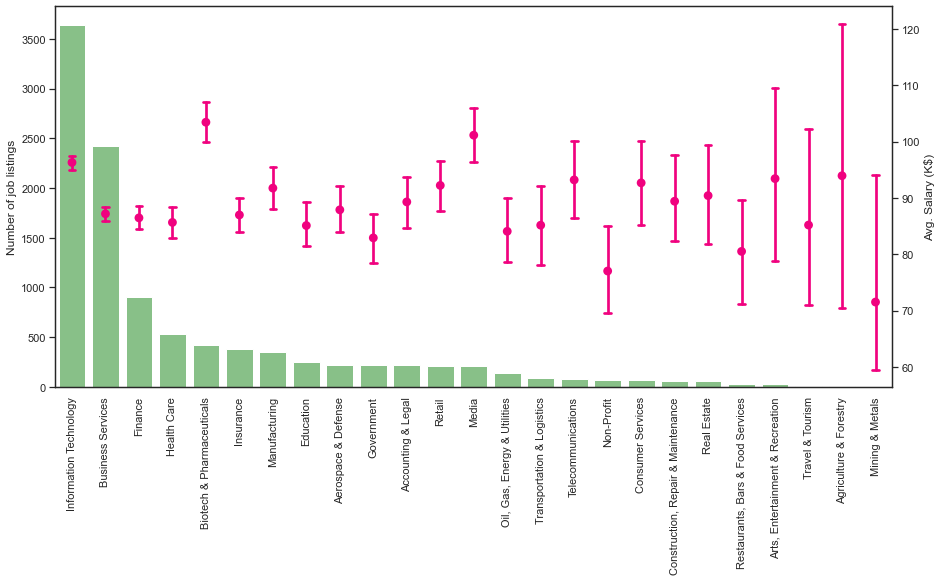

In [714]:
plt.figure(figsize = [15, 7])

sector_counts = df["Sector"].value_counts()
ax = sns.barplot(x = sector_counts.index.values, y = sector_counts, color=sns.color_palette("Accent")[0])
plt.xticks(rotation = 90);
plt.ylabel('Number of job listings')

ax2 = ax.twinx()
sns.pointplot(data=df, 
              x='Sector', 
              y='Average Salary', 
              #hue = "Job Category", 
              #ci=None,
              linestyles="", 
              dodge = True,
              order=sector_counts.index,
              capsize=.2,
              ax = ax2,
              color = sns.color_palette("Accent")[5]
              #hue_order=["Data Scientist","Data Engineer","Data Analyst","Business Analyst"]
              )
plt.ylabel('Avg. Salary (K$)');

##### 3.2.2 Which State has more data jobs/pays higher?

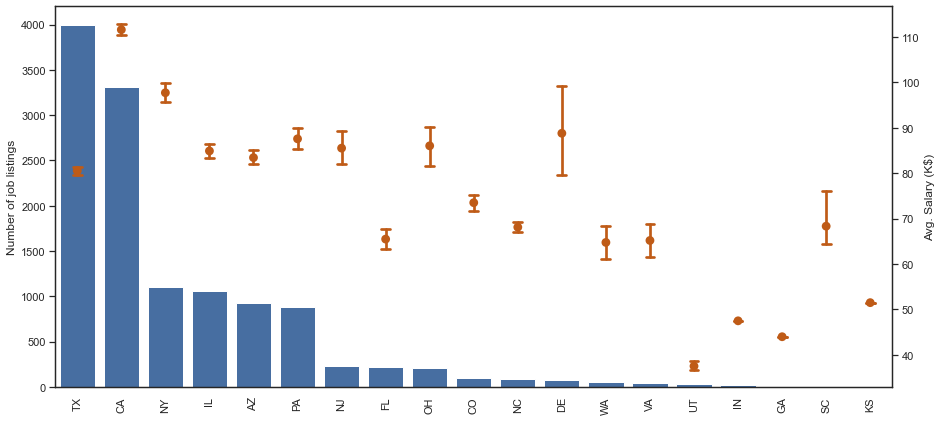

In [716]:
plt.figure(figsize = [15, 7])


state_counts = df["State"].value_counts()
ax = sns.barplot(x = state_counts.index.values, y = state_counts, color=sns.color_palette("Accent")[4])
plt.xticks(rotation = 90)
plt.ylabel('Number of job listings')

ax2 = ax.twinx()
sns.pointplot(data=df, 
              x='State', 
              y='Average Salary', 
              #hue = "Job Category", 
              #ci=None,
              linestyles="", 
              dodge = True,
              order=state_counts.index,
              capsize=.2,
              ax = ax2,
              color = sns.color_palette("Accent")[6]
              #hue_order=["Data Scientist","Data Engineer","Data Analyst","Business Analyst"]
              )
plt.ylabel('Avg. Salary (K$)');

#### 3.3 Which languages are mentioned the most in job listings?

In [984]:
def get_keyword_freq(df, job_category, keywords_lst):
    # Returns a dictionary of keywords frequency
    if job_category == 'All':
        job_descriptions = df['Job Description']
    else:
        job_descriptions = df.loc[df['Job Category']==job_category,'Job Description']
        
    keywords_freq = dict()
    for word in keywords_lst:
        counter = 0
        for jd in job_descriptions:
            if word in jd:
                counter += 1
        keywords_freq[word] = counter
    keywords_df = pd.DataFrame(list(keywords_freq.items()))
    keywords_df.columns = ['Keywords','Count']
    keywords_df['Freq'] = keywords_df['Count']/len(job_descriptions)
    return keywords_df.sort_values('Count',ascending=False).reset_index(drop=True)

In [1009]:
# Get language frequency by job category, store in a dictionary
languages = ["Python", "R ", "SQL", "Java ", "JavaScript", "Scala", "C++", "C#"]

category_lst = ['All', 'Data Scientist','Data Engineer','Data Analyst','Business Analyst']

lang = dict()
for job_category in category_lst:
    lang[job_category] = get_keyword_freq(df,job_category,languages)

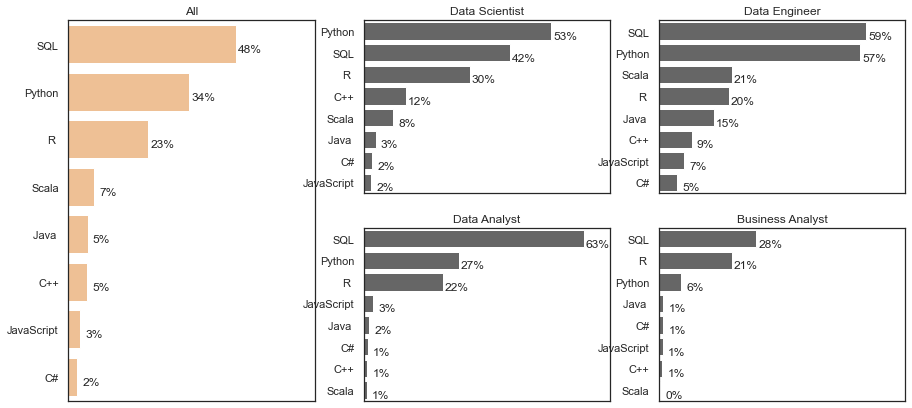

In [1056]:
# Plots
# Prepare subplot locations
plt.figure(figsize = [15, 7])
ax_dict = dict()
ax_dict['All'] = plt.subplot2grid((2,3), (0, 0), rowspan=2)
ax_dict['Data Scientist'] = plt.subplot2grid((2,3), (0, 1))
ax_dict['Data Engineer'] = plt.subplot2grid((2,3), (0, 2))
ax_dict['Data Analyst'] = plt.subplot2grid((2,3), (1, 1))
ax_dict['Business Analyst'] = plt.subplot2grid((2,3), (1, 2))


# Plots
for job_category in category_lst:
    
    if job_category == 'All':
        base_color = sns.color_palette('Accent')[2]
    else:
        base_color = sns.color_palette('Accent')[7]
        
    subplot_df = lang[job_category]
    subplot_ax = ax_dict[job_category]
    sns.barplot(y = subplot_df['Keywords'], 
                x = subplot_df['Freq'], 
                ax = subplot_ax,
                color = base_color)
    
    for l in languages:
        i = subplot_df.index[subplot_df['Keywords'] == l].values[0]
        freq = subplot_df['Freq'][i]
        freq_format = str(int(np.round(freq*100)))+'%'
        subplot_ax.text(freq+0.04, i, freq_format, ha = 'center', va='top')
    
    subplot_ax.set_title(job_category)
    subplot_ax.set_xlim(0,0.7)
    subplot_ax.set_xticks([])
    subplot_ax.set_xlabel('')
    subplot_ax.set_ylabel('')